In [227]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [228]:
#pip install xgboost

In [229]:
train = pd.read_csv("housing_train.csv", header=0)
train.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [230]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [231]:
#checking missing percent on numerical fields
missing_per = train.isna().sum()* 100 / len(X)
print(missing_per)
#print(missing_per)
train = train[list(missing_per[missing_per<=0.05].index)]

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [232]:
train.isna().sum()* 100 / len(X)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageCars   

In [233]:
X = train.drop('SalePrice',axis=1)
y = train['SalePrice']


In [234]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [235]:
num_cols = list(X_train.select_dtypes(['int64','float64']).columns)
print (num_cols)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [236]:
X_train_num = X_train[num_cols].join(y_train)
X_train_num.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.136104
EnclosedPorch   -0.129519
MSSubClass      -0.084312
OverallCond     -0.053643
YrSold          -0.045628
MiscVal         -0.024750
LowQualFinSF    -0.023128
BsmtFinSF2      -0.020622
Id              -0.017389
BsmtHalfBath    -0.010994
PoolArea         0.027441
MoSold           0.041369
3SsnPorch        0.057561
ScreenPorch      0.096740
BedroomAbvGr     0.182258
BsmtUnfSF        0.206736
BsmtFullBath     0.226432
LotArea          0.252766
HalfBath         0.283762
WoodDeckSF       0.311813
2ndFlrSF         0.320141
OpenPorchSF      0.320193
BsmtFinSF1       0.401390
Fireplaces       0.470320
YearRemodAdd     0.517822
YearBuilt        0.521242
TotRmsAbvGrd     0.542658
FullBath         0.578134
1stFlrSF         0.620740
TotalBsmtSF      0.635535
GarageArea       0.646603
GarageCars       0.660927
GrLivArea        0.721707
OverallQual      0.790636
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [237]:
num_cols_ = list(X_train_num.corr()['SalePrice'].sort_values().where(lambda x: x >= 0.5).dropna().index)
print(num_cols_)

['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice']


In [238]:
num_cols_.remove('SalePrice')
print(num_cols_)

['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual']


<Axes: >

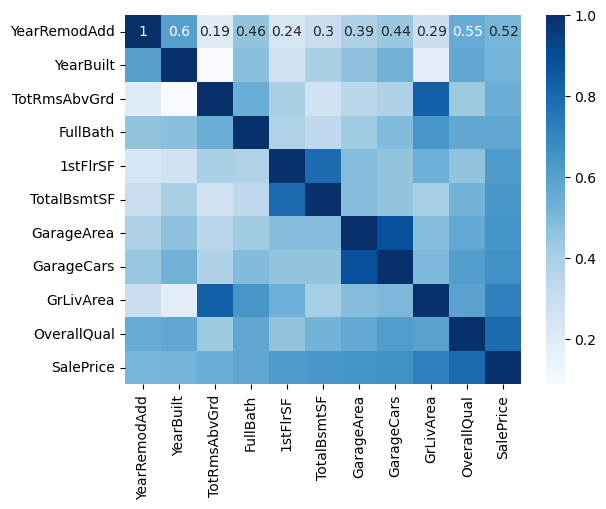

In [250]:
sns.heatmap(X_train[num_cols_].join(y_train).corr(), cmap='Blues', annot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


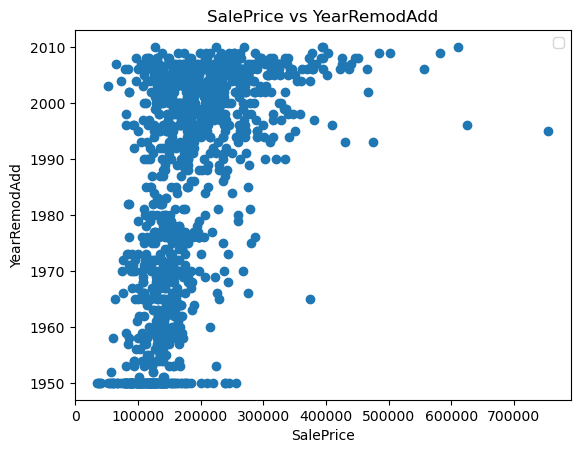

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


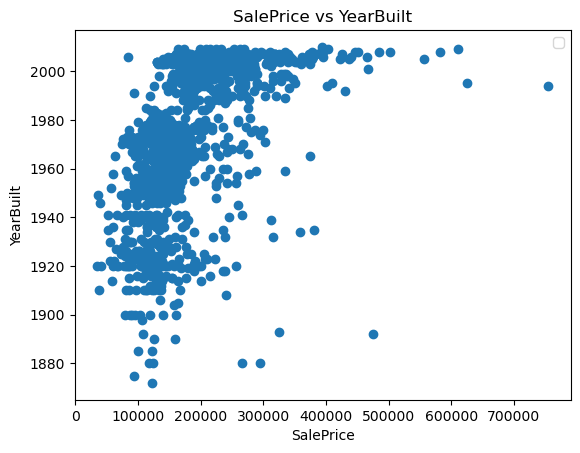

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


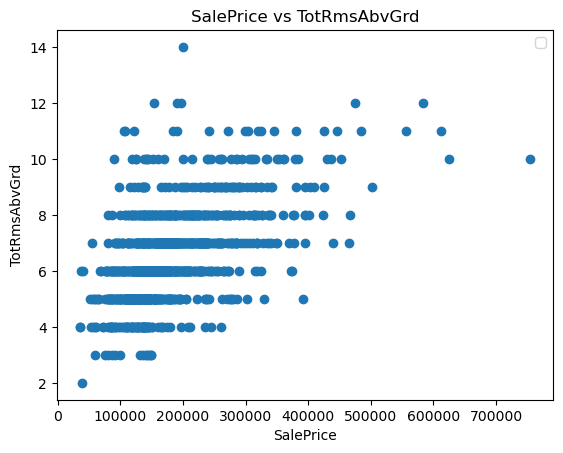

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


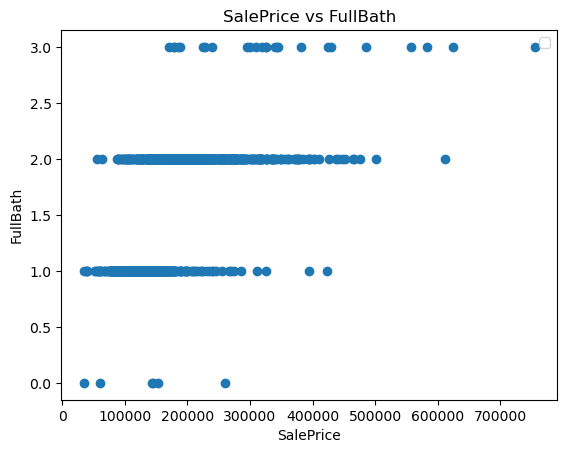

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


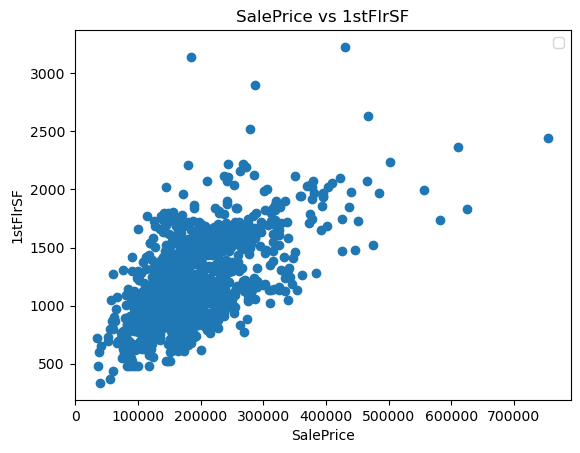

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


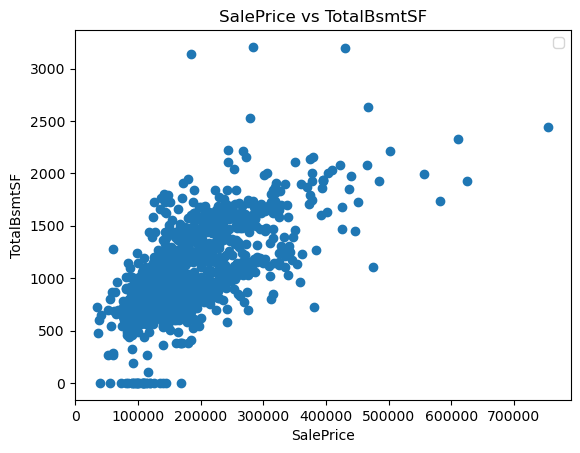

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


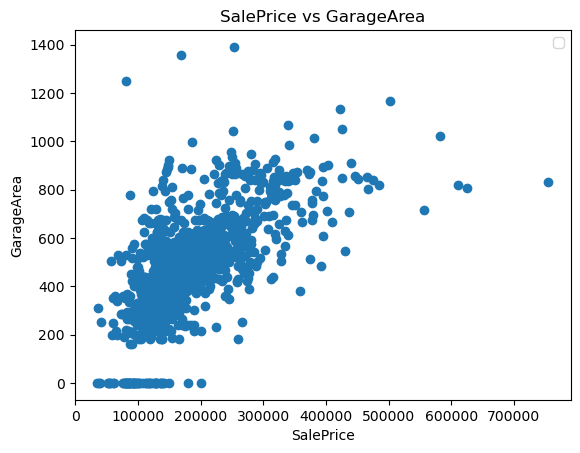

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


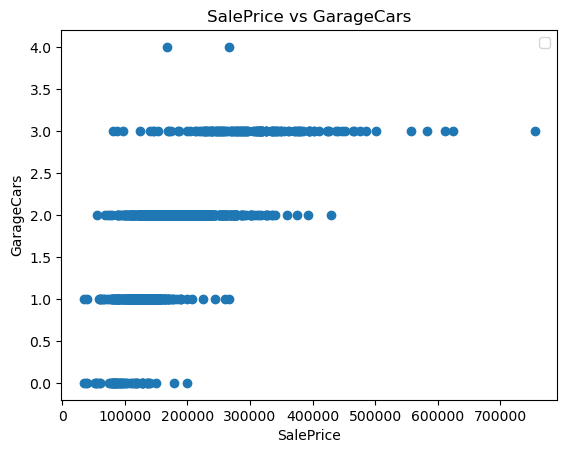

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


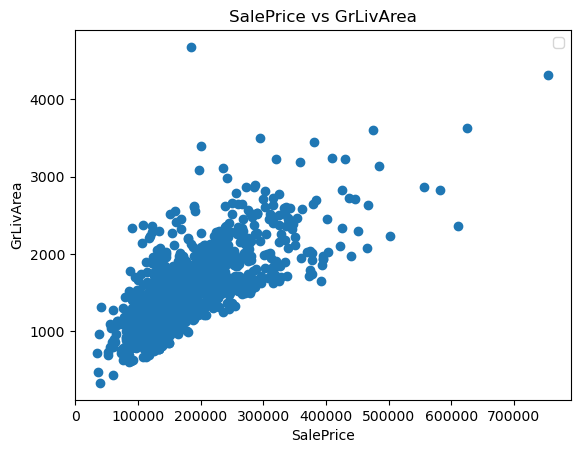

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


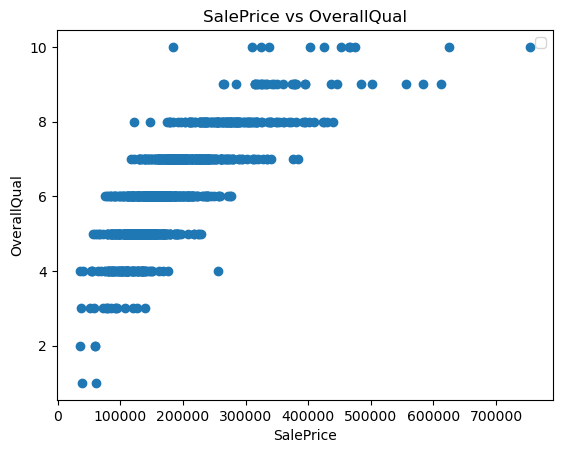

In [240]:

x_col = "SalePrice"
data = X_train[num_cols_].join(y_train)

for y_col in num_cols_:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(data[x_col], data[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()
    

In [246]:
cat_cols = list(X_train.select_dtypes(['object']).columns)
print (cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [247]:
#select only categorical files with less than 8 categorical values
cat_cols_ = list(X_train[cat_cols].loc[:, X_train.nunique() < 5].columns)
print(cat_cols_)

['Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


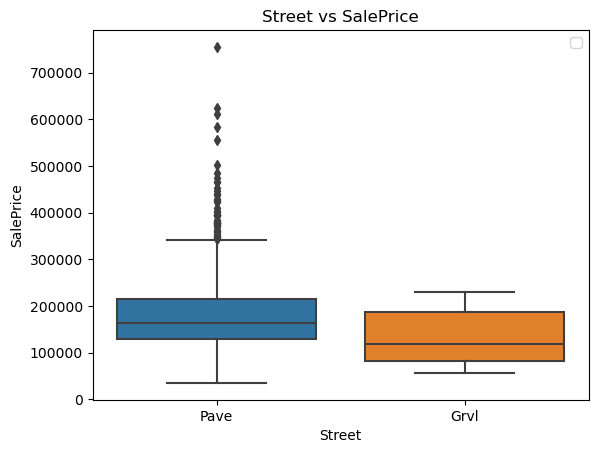

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


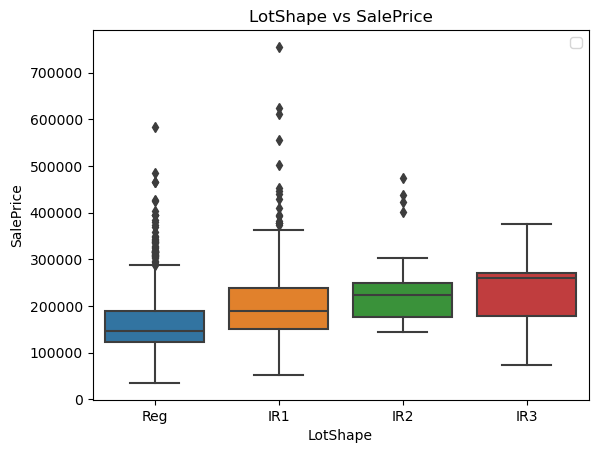

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


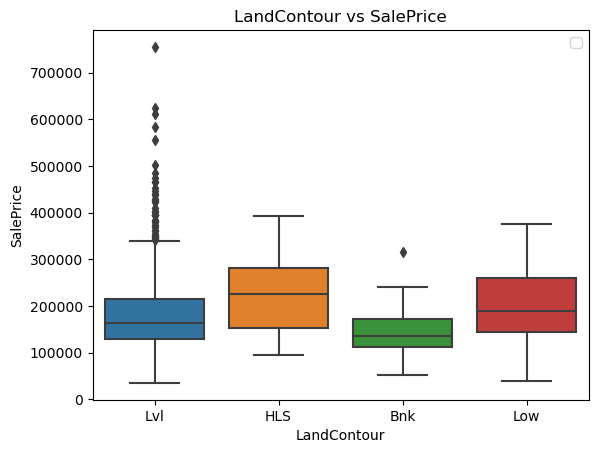

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


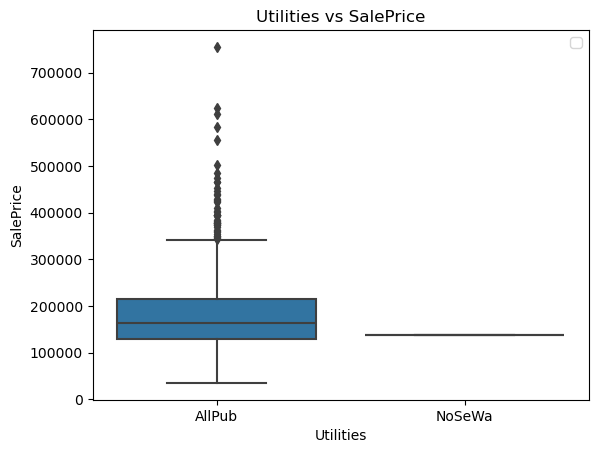

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


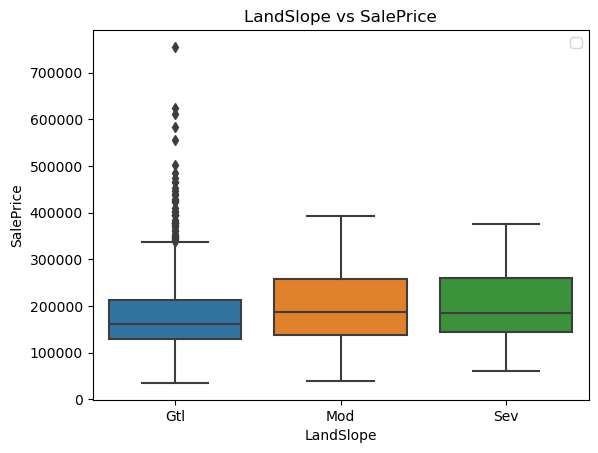

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


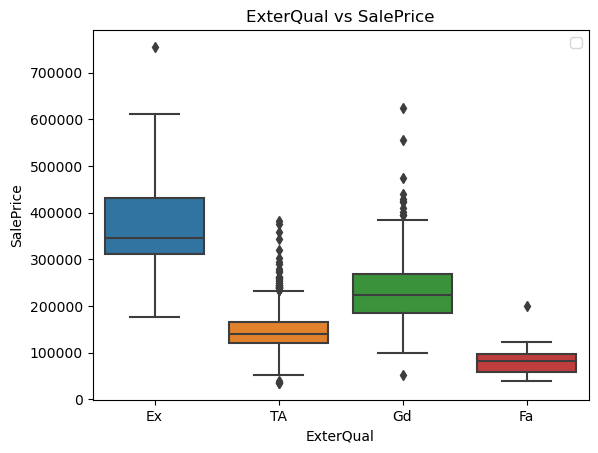

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


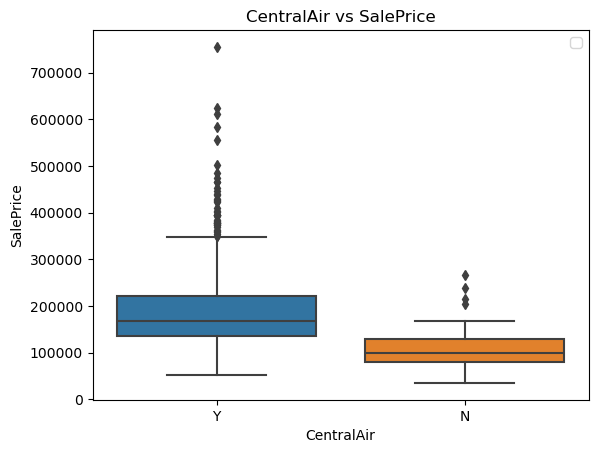

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


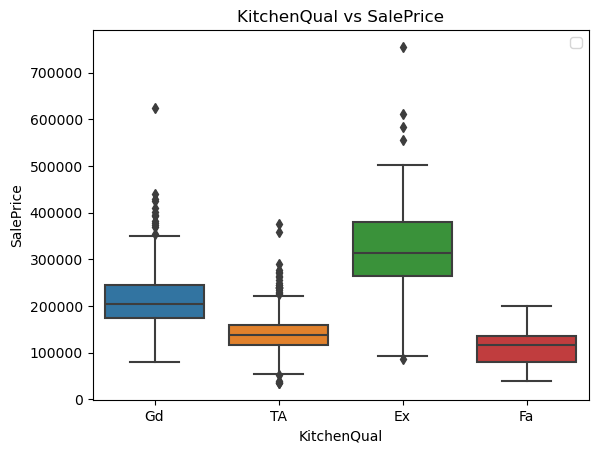

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


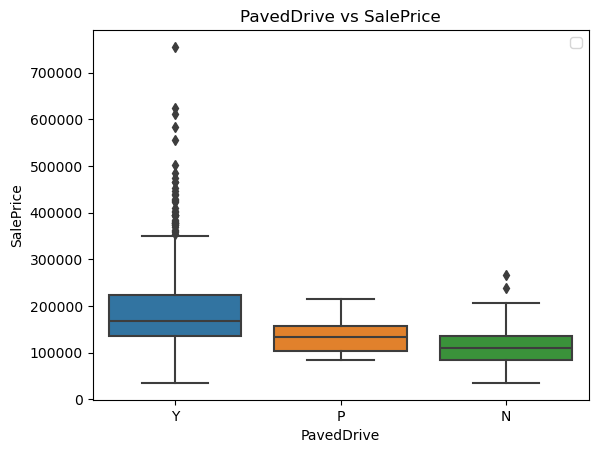

In [253]:
x_col = "SalePrice"
data = X_train.join(y_train)

for y_col in cat_cols_:

    figure = plt.figure
    ax = plt.gca()
    #data[y_col].value_counts().plot(kind='bar');
    #ax.hist(data[x_col], data[y_col])
    sns.boxplot(data=data, x=y_col, y=x_col)
    ax.set_xlabel(y_col)
    ax.set_ylabel(x_col)
    ax.set_title("{} vs {}".format(y_col, x_col))

    plt.legend()
    plt.show()

In [163]:
cols = num_cols_ + cat_cols_
print(cols)

['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive']


In [164]:
X_train = X_train[cols].copy()
X_test = X_test[cols].copy()

In [165]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
                                          ('impute',SimpleImputer(strategy='most_frequent')),
                                          ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
                                               ('num',numerical_transformer,num_cols_),
                                               ('cat',categorical_transformer,cat_cols_)
])



In [175]:
#my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4),y
my_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [176]:
pipeline = Pipeline(steps = [('preprocessor', preprocessor)])

In [177]:
X_train.head(8)

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Street,LotShape,LandContour,Utilities,LandSlope,ExterQual,CentralAir,KitchenQual,PavedDrive
618,2007,2007,9,2,1828,1822,774,3,1828,9,Pave,Reg,Lvl,AllPub,Gtl,Ex,Y,Gd,Y
870,1962,1962,5,1,894,894,308,1,894,5,Pave,Reg,Lvl,AllPub,Gtl,TA,N,TA,Y
92,2006,1921,5,1,964,876,432,2,964,5,Pave,IR1,HLS,AllPub,Gtl,TA,Y,TA,Y
817,2002,2002,7,2,1689,1568,857,3,1689,8,Pave,IR1,Lvl,AllPub,Gtl,Gd,Y,Gd,Y
302,2002,2001,6,2,1541,1541,843,3,1541,7,Pave,IR1,Lvl,AllPub,Gtl,Gd,Y,Gd,Y
1454,2005,2004,6,2,1221,1221,400,2,1221,7,Pave,Reg,Lvl,AllPub,Gtl,Gd,Y,Gd,Y
40,1965,1965,6,2,1324,1088,440,2,1324,6,Pave,Reg,Lvl,AllPub,Gtl,TA,Y,TA,Y
959,1999,1999,6,2,696,696,484,2,1416,7,Pave,Reg,Lvl,AllPub,Gtl,Gd,Y,Gd,Y


In [178]:
X_train_transformed = pipe.fit_transform(X_train)

In [179]:
X_test_transformed = pipe.transform(X_test)

In [180]:
my_model.fit(X_train_transformed, y_train, eval_metric = "mae", eval_set=[(X_test_transformed, y_test)])

[0]	validation_0-mae:52236.25514
[1]	validation_0-mae:48041.38388
[2]	validation_0-mae:44379.83851
[3]	validation_0-mae:41168.60306
[4]	validation_0-mae:38141.43750
[5]	validation_0-mae:35465.81469
[6]	validation_0-mae:33143.10087
[7]	validation_0-mae:30959.91928
[8]	validation_0-mae:29165.80351
[9]	validation_0-mae:27552.76873
[10]	validation_0-mae:26161.80196
[11]	validation_0-mae:25011.27357
[12]	validation_0-mae:24065.68533
[13]	validation_0-mae:23273.79942
[14]	validation_0-mae:22578.40408
[15]	validation_0-mae:21913.87944
[16]	validation_0-mae:21217.36363
[17]	validation_0-mae:20837.75043
[18]	validation_0-mae:20507.55568
[19]	validation_0-mae:20155.85360
[20]	validation_0-mae:19898.76830
[21]	validation_0-mae:19587.28564
[22]	validation_0-mae:19458.28770
[23]	validation_0-mae:19337.92725
[24]	validation_0-mae:19234.49925
[25]	validation_0-mae:19112.62949
[26]	validation_0-mae:19086.53529
[27]	validation_0-mae:19055.34581
[28]	validation_0-mae:19056.53837
[29]	validation_0-mae:18

C:\Users\atanu\AppData\Roaming\Python\Python311\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-mae:18965.80158
[32]	validation_0-mae:18963.22951
[33]	validation_0-mae:18912.67525
[34]	validation_0-mae:18843.51653
[35]	validation_0-mae:18883.45046
[36]	validation_0-mae:18799.56389
[37]	validation_0-mae:18795.81468
[38]	validation_0-mae:18789.41592
[39]	validation_0-mae:18836.37195
[40]	validation_0-mae:18834.87108
[41]	validation_0-mae:18873.88632
[42]	validation_0-mae:18893.41944
[43]	validation_0-mae:18821.84755
[44]	validation_0-mae:18843.87227
[45]	validation_0-mae:18795.12434
[46]	validation_0-mae:18789.68484
[47]	validation_0-mae:18799.52530
[48]	validation_0-mae:18785.41757
[49]	validation_0-mae:18800.59288
[50]	validation_0-mae:18809.98507
[51]	validation_0-mae:18811.72604
[52]	validation_0-mae:18779.58526
[53]	validation_0-mae:18741.78118
[54]	validation_0-mae:18745.24795
[55]	validation_0-mae:18779.17575
[56]	validation_0-mae:18787.11529
[57]	validation_0-mae:18813.55743
[58]	validation_0-mae:18782.65872
[59]	validation_0-mae:18777.56158
[60]	validatio

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [181]:
from sklearn.metrics import mean_absolute_error
preds = my_model.predict(X_test_transformed)

# Evaluate the model
mae = mean_absolute_error(y_test, preds)
print('MAE:', mae)



MAE: 19277.300232769692


In [182]:
pd.Series(preds).head(10)

0    268494.375000
1    131651.843750
2    132101.359375
3    200955.390625
4     96734.359375
5    128344.054688
6    255972.656250
7    122339.484375
8    710757.687500
9    146760.296875
dtype: float32

In [183]:
y_test.sort_index().head(10)

1     181500
2     223500
4     250000
5     143000
9     118000
14    157000
18    159000
19    139000
27    306000
29     68500
Name: SalePrice, dtype: int64